In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("dataset.csv")

data['Languages'] = data['Marque as linguagens de programação que você já teve algum contato prático:'].str.split('\n')
data = data.explode('Languages')

pivot_table = data.pivot_table(index='Languages', columns='Gênero', aggfunc='size', fill_value=0)


pivot_table = pivot_table.loc[pivot_table.sum(axis=1).sort_values(ascending=False).index]


pivot_table.plot(kind='barh', stacked=True, color=['red', 'blue'])

plt.ylabel("Linguagem")
plt.xlabel("Número de usuários")
plt.title("Número de usuários de cada linguagem por gênero")
plt.show()


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 13: invalid continuation byte

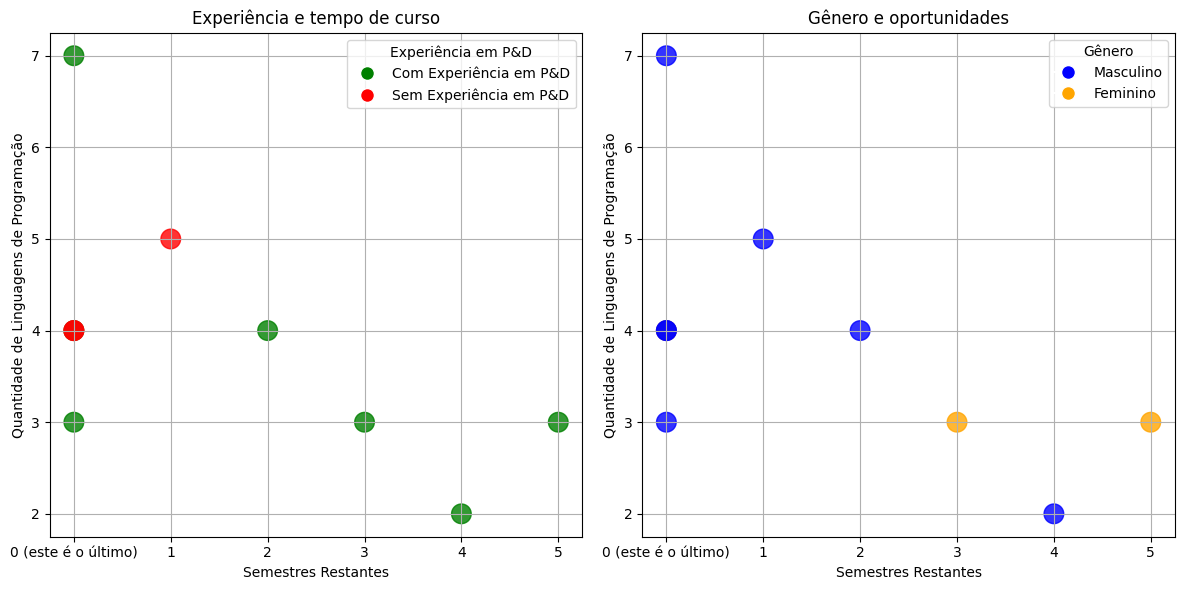

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("dataset.csv")

cores_genero = ['blue' if g == 'M' else 'orange' for g in data['Gênero']]
cores_pd = ['green' if exp == 'Sim' else 'red' for exp in data['Você já teve experiência de participação em projetos de Pesquisa e Desenvolvimento?']]

semestres_restantes_sorted, linguagens_programacao_sorted, cores_pd_sorted, cores_genero_sorted = zip(*sorted(zip(data['Quantos semestres faltam para você se formar?'], data['Marque as linguagens de programação que você já teve algum contato prático:'].apply(lambda x: len(x.split('\n'))), cores_pd, cores_genero), reverse=True))

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.scatter(semestres_restantes_sorted[::-1], linguagens_programacao_sorted[::-1], c=cores_pd_sorted[::-1], alpha=0.8, s=200)
plt.xlabel('Semestres Restantes')
plt.ylabel('Quantidade de Linguagens de Programação')
plt.title('Experiência e tempo de curso')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Com Experiência em P&D'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Sem Experiência em P&D')],
           title='Experiência em P&D')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(semestres_restantes_sorted[::-1], linguagens_programacao_sorted[::-1], c=cores_genero_sorted[::-1], alpha=0.8, s=200)
plt.xlabel('Semestres Restantes')
plt.ylabel('Quantidade de Linguagens de Programação')
plt.title('Gênero e oportunidades')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Masculino'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Feminino')],
           title='Gênero')
plt.grid(True)
plt.tight_layout()
plt.show()
